In [195]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

%matplotlib notebook

from run_utils import get_env_dataset, run_env_experiment, plot_ratings_mses
from env_defaults import TOPICS_STATIC, get_len_trial, TOPICS_STATIC_SMALL, LATENT_STATIC_SMALL, ML_100K_SMALL, TOPICS_DYNAMIC_SMALL, LATENT_DYNAMIC_SMALL

sys.path.append('../') 
from reclab.environments.latent_factors import DatasetLatentFactor, LatentFactorBehavior
from reclab.environments import Topics

from reclab.recommenders import LibFM, TopPop, RandomRec, PerfectRec



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Exploration with Different User Behaviors

In this notebook, for a fixed level of model and user behavior complexity, we illustrate how epsilon-greedy exploration strategies compare for static and dynamin user models.

In [196]:
## Key Parameters across all settings

bucket_name = None

n_trials = 3
trial_seeds = [i for i in range(n_trials)]
len_trial = get_len_trial(LATENT_STATIC_SMALL)
num_init_ratings = LATENT_STATIC_SMALL['optional_params']['num_init_ratings']

# Environment setup
environment_names = [LATENT_STATIC_SMALL['name'], LATENT_DYNAMIC_SMALL['name']]
envs = [
#     LatentFactorBehavior(**LATENT_STATIC_SMALL['params'], **LATENT_STATIC_SMALL['optional_params']), 
#         LatentFactorBehavior(**LATENT_DYNAMIC_SMALL['params'], **LATENT_DYNAMIC_SMALL['optional_params'])]
       Topics(**TOPICS_STATIC_SMALL['params'], **TOPICS_STATIC_SMALL['optional_params']),
       Topics(**TOPICS_DYNAMIC_SMALL['params'], **TOPICS_DYNAMIC_SMALL['optional_params'])]
#        DatasetLatentFactor(**ML_100K_SMALL['params'], **ML_100K_SMALL['optional_params']),]

# Recommender setup
recommender_names = ['toppop', 'perfect']


In [197]:

recommenders_base = [
#     LibFM(
#         num_user_features=0,
#         num_item_features=0,
#         num_rating_features=0,
#         max_num_users=num_users,
#         max_num_items=num_items,
#         method='sgd',
#         learning_rate=0.01,
#     ),
#     RandomRec(
#     ),
    TopPop(
    ),
] 
# recommenders_base = []

In [198]:

all_ratings = {}
all_predictions = {}
all_dense_ratings = {}
all_dense_predictions = {}

for env, env_name in zip(envs, environment_names):
    
    def get_dense_ratings(env):
        def func():
            return env.dense_ratings
        return func

    recommenders = recommenders_base + [PerfectRec(get_dense_ratings(env))]


    res = run_env_experiment(
            [env],
            recommenders,
            trial_seeds,
            len_trial,
            environment_names=[env_name],
            recommender_names=recommender_names,
            bucket_name=bucket_name)
    ratings, predictions, dense_ratings, dense_predictions = res
    all_ratings[env_name] = ratings[0]
    all_predictions[env_name] = predictions[0]
    all_dense_ratings[env_name] = dense_ratings[0]
    all_dense_predictions[env_name] = dense_predictions[0]


Started experiments on environment: latent_static_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 28.135294117647057%
Running trials for recommender: toppop
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: perfect
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Started experiments on environment: latent_dynamic_small
	Initial density: 5.88235294117647%, Final density: 11.76470588235294%, Good item density: 29.064705882352943%
Running trials for recommender: toppop
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2



Running trials for recommender: perfect
Running trial with seed: 0



Running trial with seed: 1



Running trial with seed: 2


In [199]:
all_ratings.keys()

dict_keys(['latent_static_small', 'latent_dynamic_small'])

<IPython.core.display.Javascript object>


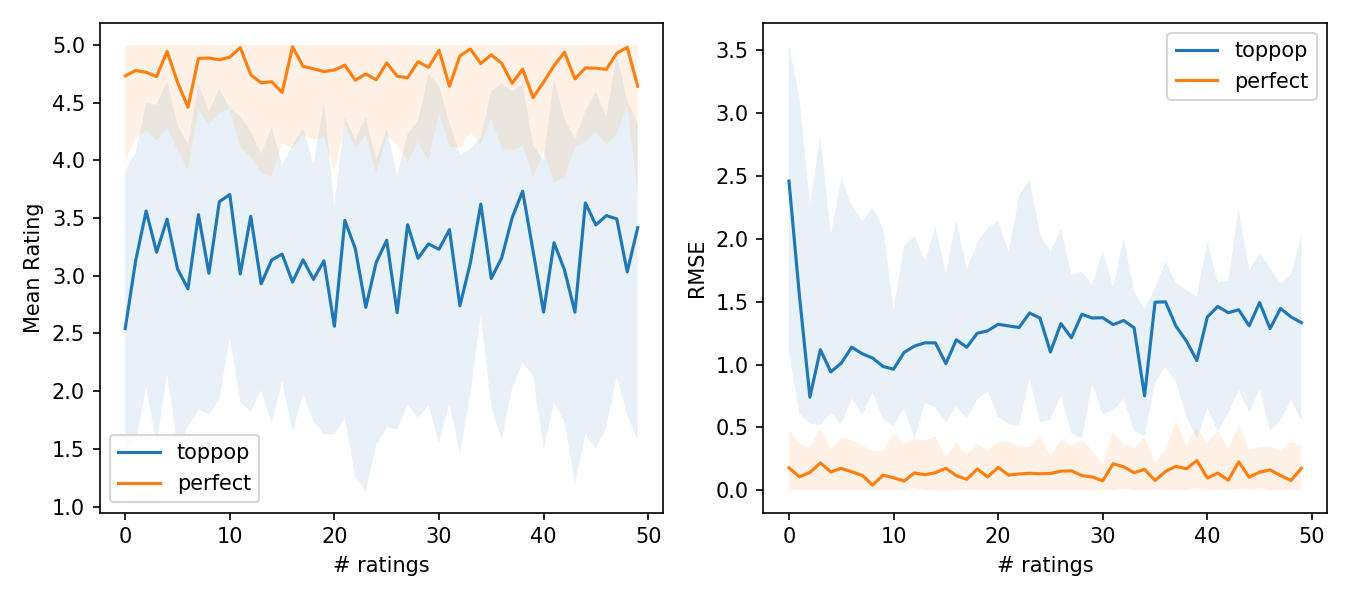

<IPython.core.display.Javascript object>


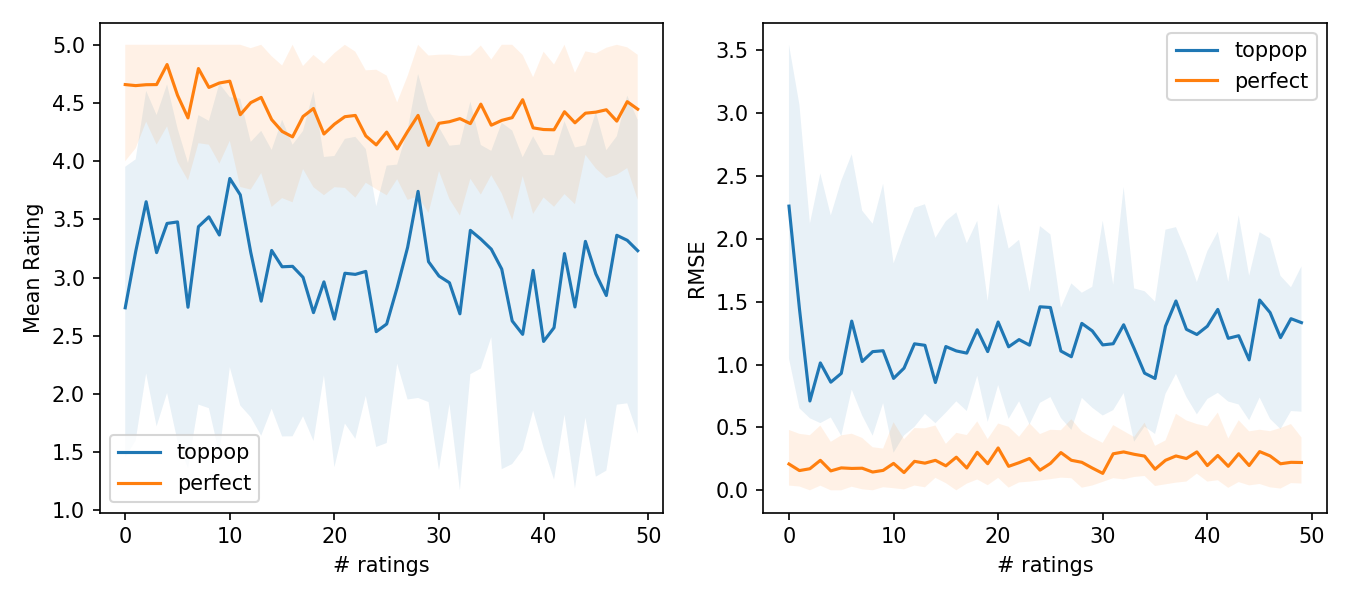

In [201]:
for env_name in all_ratings.keys():
    plot_ratings_mses(all_ratings[env_name], np.clip(all_predictions[env_name], 1, 5), recommender_names, summary_type='median')
    # plt.title(env_name)

In [30]:
all_dense_ratings[env_name]

array([[[[1.97665767, 2.9300821 , 3.74936566, ..., 4.94065   ,
          3.1668672 , 3.82708113],
         [1.97665767, 2.9300821 , 3.74936566, ..., 4.94065   ,
          3.1668672 , 3.82708113],
         [1.97665767, 2.9300821 , 3.74936566, ..., 4.94065   ,
          3.1668672 , 3.82708113],
         ...,
         [2.97665767, 3.9300821 , 4.74936566, ..., 5.        ,
          4.1668672 , 4.82708113],
         [2.97665767, 3.9300821 , 4.74936566, ..., 5.        ,
          4.1668672 , 4.82708113],
         [2.97665767, 3.9300821 , 4.74936566, ..., 5.        ,
          4.1668672 , 4.82708113]],

        [[1.97665767, 2.9300821 , 3.74936566, ..., 4.94065   ,
          3.1668672 , 3.82708113],
         [2.17665767, 3.1300821 , 3.94936566, ..., 4.94065   ,
          3.1668672 , 3.82708113],
         [2.17665767, 3.1300821 , 3.94936566, ..., 4.94065   ,
          3.1668672 , 3.82708113],
         ...,
         [2.97665767, 3.9300821 , 4.74936566, ..., 5.        ,
          4.1668672 , 4.8

In [31]:
all_dense_predictions[env_name]

array([[[[2.41880541, 3.12119245, 2.66568344, ..., 3.99273539,
          3.35334161, 3.76904568],
         [2.41880541, 3.12119245, 2.66568344, ..., 3.99273539,
          3.35334161, 3.76904568],
         [2.41880541, 3.12119245, 2.66568344, ..., 3.99273539,
          3.35334161, 3.76904568],
         ...,
         [2.41880541, 3.12119245, 2.66568344, ..., 4.16993038,
          3.35334161, 3.54039904],
         [2.41880541, 3.12119245, 2.66568344, ..., 4.16993038,
          3.35334161, 3.54039904],
         [2.41880541, 3.12119245, 2.66568344, ..., 4.16993038,
          3.35334161, 3.54039904]],

        [[2.41880541, 3.12119245, 2.66568344, ..., 3.99273539,
          3.35334161, 3.76904568],
         [2.41880541, 3.12119245, 2.66568344, ..., 3.99273539,
          3.35334161, 3.76904568],
         [2.41880541, 3.12119245, 2.66568344, ..., 3.99273539,
          3.35334161, 3.76904568],
         ...,
         [2.41880541, 3.12119245, 2.66568344, ..., 4.14920588,
          3.35334161, 3.6